## **Segmentation Using K-Means Clustering**

**Read This:** https://thepythoncode.com/article/kmeans-for-image-segmentation-opencv-python

K-means clustering is a popular method for image segmentation in OpenCV. The technique works by grouping pixels with similar colors or intensities into clusters. Here’s a step-by-step explanation and code for performing segmentation using K-means clustering:

#### **Steps:**
1. **Load the Image**: Read the input image using OpenCV.
2. **Reshape the Image**: Convert the image into a 2D array where each pixel is represented by its color/intensity values (e.g., RGB).
3. **Convert to Float32**: K-means in OpenCV requires data in `float32` format.
4. **Apply K-means**: Specify the number of clusters (`K`), criteria for convergence, and number of iterations.
5. **Reshape Back**: Map the clustered data back to the original image shape to visualize the segmented regions.

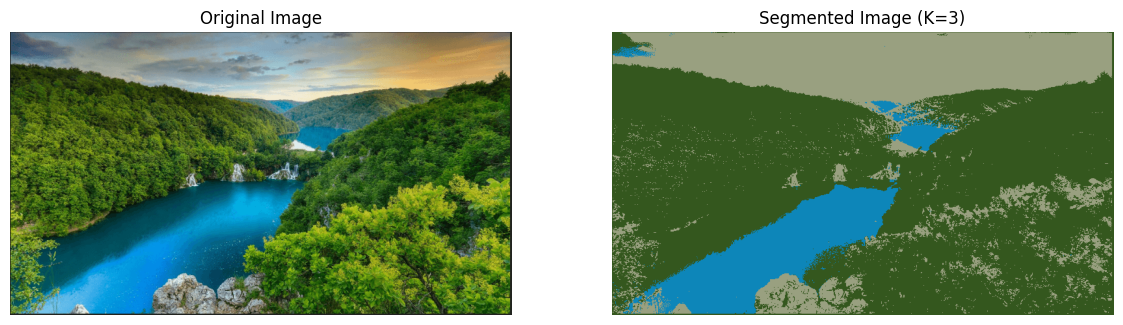

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the image
image = cv2.imread("../Data/Images/demonstration-image.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 2: Reshape the image into a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)  # Convert to float32

# Step 3: Define criteria and apply KMeans
# Criteria: (type, max_iter, epsilon)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3  # Number of clusters
# cv2.kmeans(data, K, bestLabels, criteria, attempts, flags)
_, labels, centers = cv2.kmeans(
    pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS
)

# Step 4: Convert centers to uint8 and map labels to original image
centers = np.uint8(centers)
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)


images = [image, segmented_image]
titles = ["Original Image", f"Segmented Image (K={k})"]


plt.figure(figsize=(22, 10))
for i in range(len(images)):
    plt.subplot(1, 3, i + 1)
    plt.axis("off")
    plt.title(titles[i])
    plt.imshow(images[i])
plt.show()

#### Explanation of Key Parameters:
- **`k`**: The number of clusters. Adjust based on the level of segmentation needed.
- **Criteria**: Determines when to stop the algorithm.
  - `cv2.TERM_CRITERIA_EPS`: Stop if the accuracy is below a threshold.
  - `cv2.TERM_CRITERIA_MAX_ITER`: Stop after a fixed number of iterations.
  - Combination of the above is common.
- **Iterations**: Number of attempts with different initial centers for better clustering.
- **`epsilon`** Defines the accuracy threshold for convergence. It specifies the minimum change in the sum of squared distances between the pixels and their corresponding cluster centers that will be considered sufficient for the algorithm to stop.

- **`bestLabels`** is an optional input that specifies initial labels for the clusters. It allows you to provide a starting point for the clustering process, which can influence the outcome.
- **`attempts`** Integer value. Specifies how many times the algorithm is run with different initial cluster centers. The result with the lowest compactness (sum of squared distances) is returned as the final output.